# Epidemiological Model Assignment - Parameter exploration

Understanding disease dynamics
Overview

Duration: 3-5 hours
Group size: 3-4 students
Format: Jupyter Notebook
Assessment: Repository setup (5%), Code quality (30%), Documentation (25%), Results interpretation (40%)

This assignment focuses on systematic parameter exploration to understand how different factors affect epidemic outcomes.

Setup and submission format
Jupyter notebook structure

Your submission should be a single notebook with the following sections:

- **Setup & Imports** (provided starter code)  
- **Part 1:** Parameter Analysis Function  
- **Part 2:** Scenario Comparison  
- **Part 3:** Policy Recommendations  
- **Conclusions** 


Setup & Imports (provided starter code) 
Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns

# Assignment Task: Recovery Rate Investigation

Using the **SIRD model** from your practical as a starting point, you will investigate how the **recovery rate** affects epidemic outcomes.

---

## Part 1: Parameter Analysis Function (50 points)

### Task  
Create a function called `analyze_recovery_rates()` that systematically explores different recovery rates.

### 1.1 Function Implementation  
Create a **well-documented function** with the following signature:


In [82]:
def sird_model(y, t, beta, gamma, mu):
    S,I,R,D= y
    N = S+I+R+D
    dSdt = -beta * S * I / N
    dIdt = (beta * S * I / N - gamma * I) - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

def run_sird_simulation(beta, gamma, mu, N=1000, I0=10, days=150):
    S0 = N - I0
    R0 = 0
    D0 = 0
    y0 = [S0, I0, R0, D0]

    t = np.linspace(0, days, days)
    sol = odeint(sird_model,  y0, t, args=(beta, gamma, mu))
    S, I, R, D = sol.T

    return t,S,I,R,D


def analyze_recovery_rates(beta, mu, N, I0, simulation_days):
    """
    Analyze epidemic outcomes for different recovery rates.

    Parameters:
    -----------
    beta : float
        Transmission rate
    mu : float  
        Mortality rate
    N : int
        Total population
    I0 : int
        Initial infected individuals
    simulation_days : int
        Simulation duration in days

    Returns:
    --------
    pandas.DataFrame
        Results summary for each recovery rate
    fig : matplotlib.figure.Figure
        Figure with properly labeled axes, legend, and title.
    """
    # Your implementation here

    # Storage
    series = {}  # key: (beta, gamma, mu) -> (t, S, I, R, D)
    res=[]

    gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]

    # Calculations for each gamma value
    for gamma in gamma_values:
        t,S,I,R,D = run_sird_simulation(beta, gamma, mu, N, I0, simulation_days)
        peak_infected=int(np.max(I))
        peak_day=int(np.argmax(I))
        total_deaths=int(D[-1])
        R0=beta/gamma

        res.append({
            "gamma" :gamma,
            "R0": R0,
            "peak_infected": peak_infected,
            "peak_day": peak_day,
            "total_deaths": total_deaths
   
        })
        series[(beta, gamma, mu)] = (t, S, I, R, D)


    # Plotting
    comps = ("S", "I", "R", "D") 
   
    fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=150)
    ax_map = {"S": axs[0,0], "I": axs[0,1], "R": axs[1,0], "D": axs[1,1]}

    for comp in comps:
        ax = ax_map[comp]
        for (beta, gamma, mu), (t, S, I, R, D) in series.items():
            y = {"S": S, "I": I, "R": R, "D": D}[comp]
            ax.plot(t, y, lw=2, label=f"γ={gamma:.2f}")
            ax.set_xlabel("Day")
            ax.set_ylabel(comp)
            ax.set_title(f"{comp}(t)")
            ax.grid(True, alpha=0.3)

   # Single legend at top
    handles, labels = ax_map[comps[0]].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper left",
              ncol=3 if len(labels) > 8 else 2, frameon=False, fontsize=8)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    fig.suptitle(f"SIRD simulations with varying recovery rates (γ) for: β={beta:.2f}, μ={mu:.3f}",)

    return pd.DataFrame(res), fig

## DISCLAIMER: USE OF GENERATIVE AI
# The function above was partially developed with the assistance of ChatGPT-5



(   gamma   R0  peak_infected  peak_day  total_deaths
0   0.05  6.0            479        25           165
1   0.10  3.0            269        27            83
2   0.15  2.0            136        30            47
3   0.20  1.5             57        33            26
4   0.25  1.2             18        29            11, <Figure size 1800x1200 with 4 Axes>)


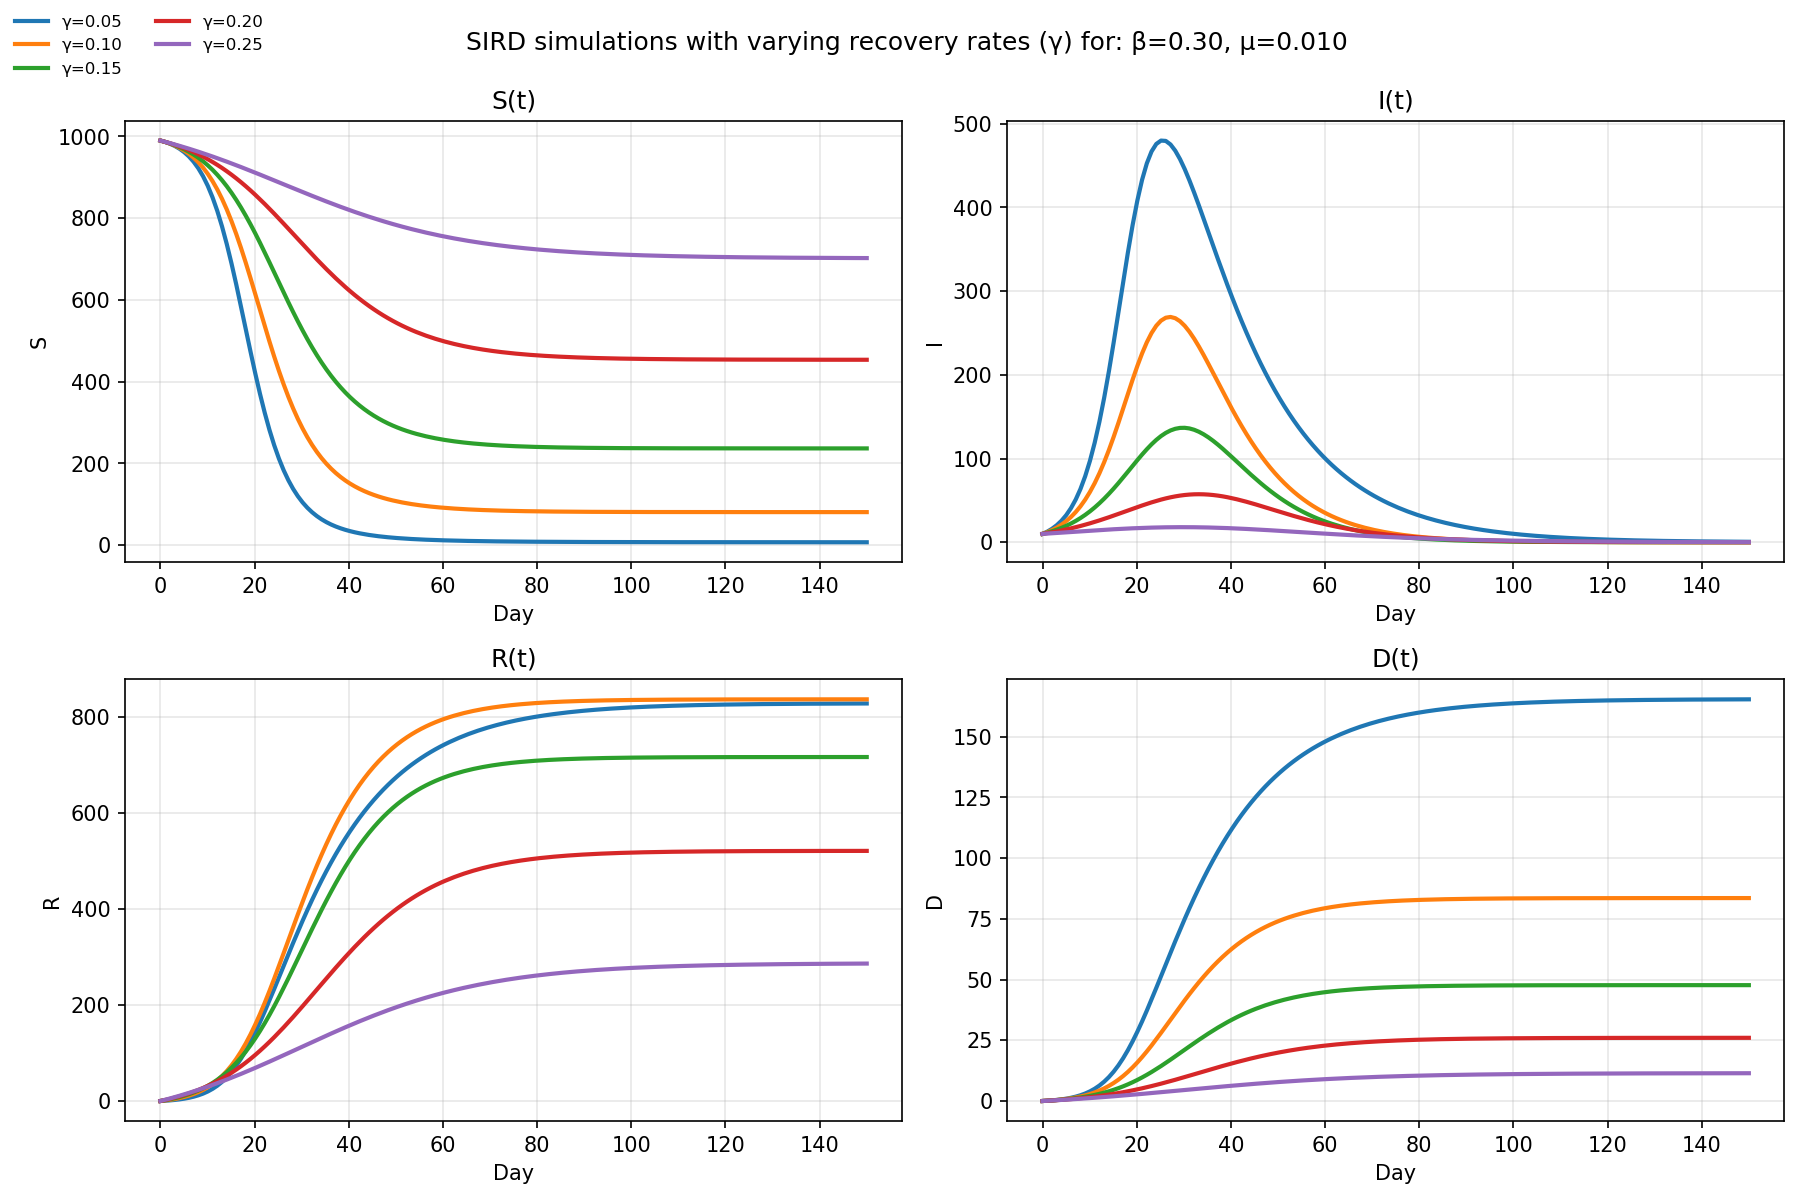

In [83]:
df =analyze_recovery_rates(beta=0.3, mu=0.01, N =1000, I0=10, simulation_days=150 )
print(df)

---

### 1.2 Requirements  

- Test recovery rates:  
  `gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]`  

- For each γ value, calculate:  
  - Peak number of infectious individuals  
  - Day when peak occurs  
  - Total deaths at end of simulation  
  - Basic reproduction number *(R₀ = β/γ)*  

- Return results as a **formatted pandas DataFrame**  

- Generate a **publication-quality plot** showing all epidemic curves  

---

### 1.3 Expected Output Format  

Your function should produce:  

1. A **DataFrame** with columns:  
['gamma', 'R0', 'peak_infected', 'peak_day', 'total_deaths']

2. A **matplotlib figure** with:  
- Properly labeled axes  
- Legend  
- Title  


## Part 2: Scenario Comparison (30 points)

---

### 2.1 Scenario Analysis  
Use your function to compare **two scenarios**:

- **Scenario A – "High Transmission"**  
  - `beta = 0.4`  
  - `mu = 0.02`  
  - `N = 1000`  
  - `I0 = 5`  
  - `simulation_days = 200`  

- **Scenario B – "Low Transmission"**  
  - `beta = 0.2`  
  - `mu = 0.005`  
  - `N = 1000`  
  - `I0 = 5`  
  - `simulation_days = 200`  

---

### 2.2 Deliverables  
Create notebook cells that:  

1. Run both scenarios using your function  
2. Display both result **DataFrames**  
3. Create a **comparative visualization** (side-by-side plots or combined plot)  
4. Write a **Markdown cell analysis** explaining which scenario is worse for public health and **why**  


Scenario A:
   gamma        R0  peak_infected  peak_day  total_deaths
0   0.05  8.000000            520        21           284
1   0.10  4.000000            340        22           159
2   0.15  2.666667            213        24           102
3   0.20  2.000000            123        27            67
4   0.25  1.600000             63        30            42
------------------------
Scenerio B:
   gamma        R0  peak_infected  peak_day  total_deaths
0   0.05  4.000000            371        44            88
1   0.10  2.000000            139        52            36
2   0.15  1.333333             31        67            13
3   0.20  1.000000              5         0             1
4   0.25  0.800000              5         0             0


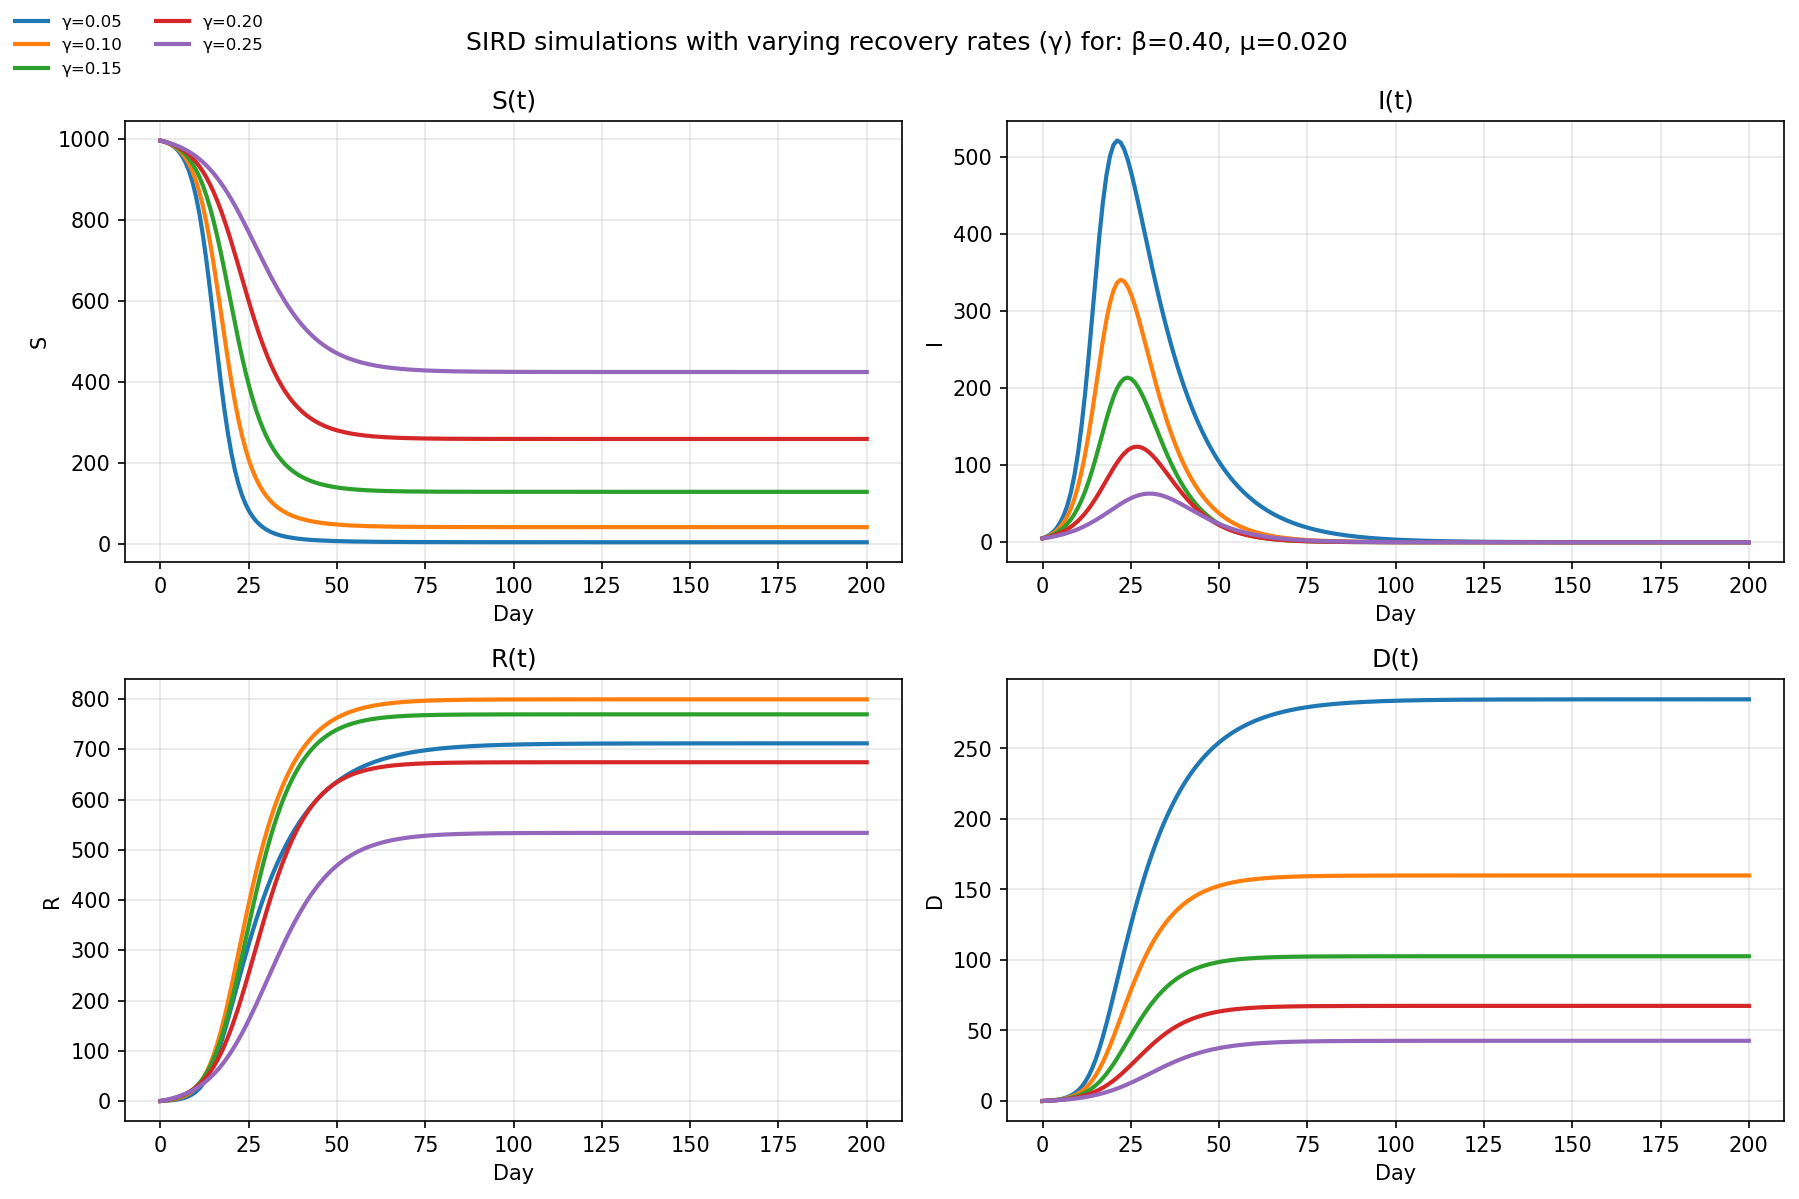

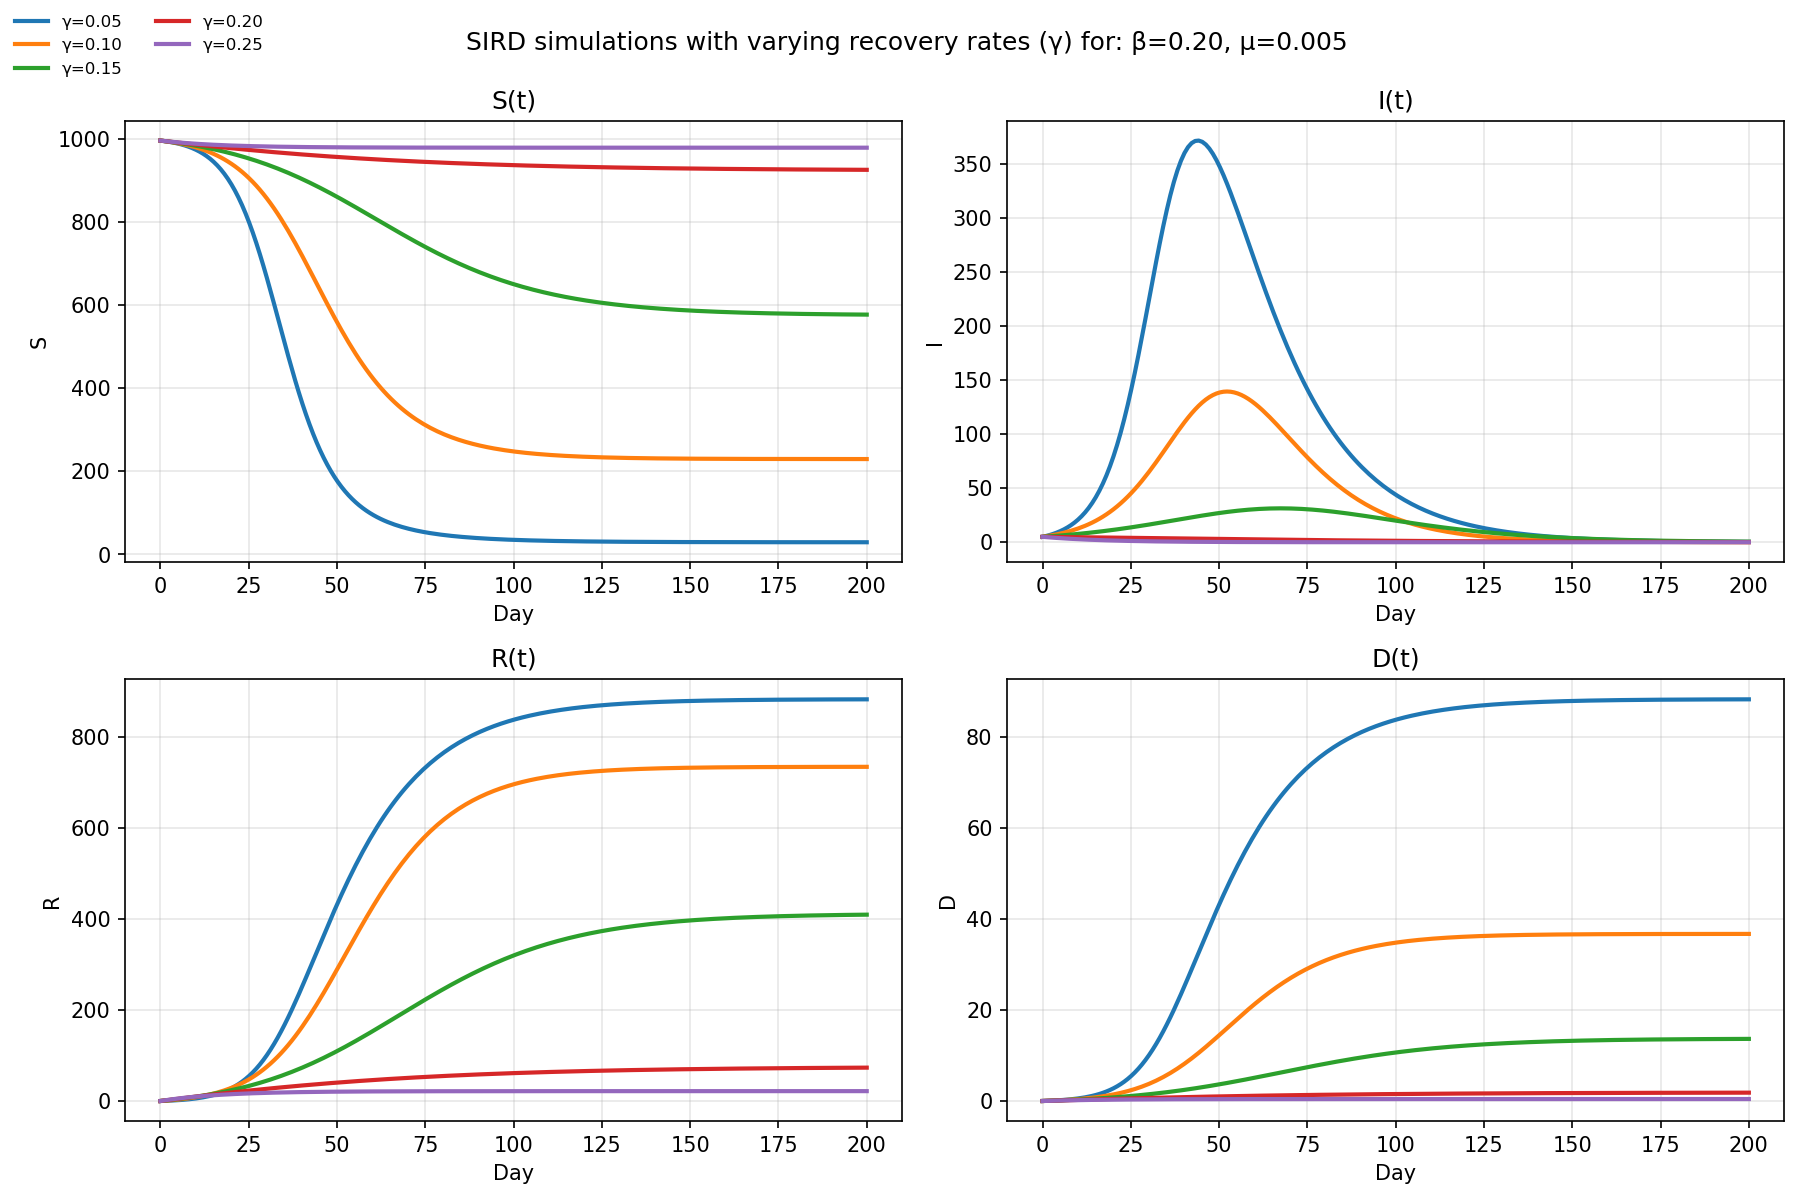

In [84]:
#2.1 and 2.2:

#scenario A
df_a, fig_a = analyze_recovery_rates(
    beta = 0.4,
    mu = 0.02,
    N=1000, 
    I0=5, 
    simulation_days=200  
)

#scenario B
df_b, fig_b = analyze_recovery_rates(
    beta = 0.2,
    mu = 0.005,
    N=1000, 
    I0=5, 
    simulation_days=200  
)

print("Scenario A:")
print(df_a)
print("------------------------")
print("Scenerio B:")
print(df_b)


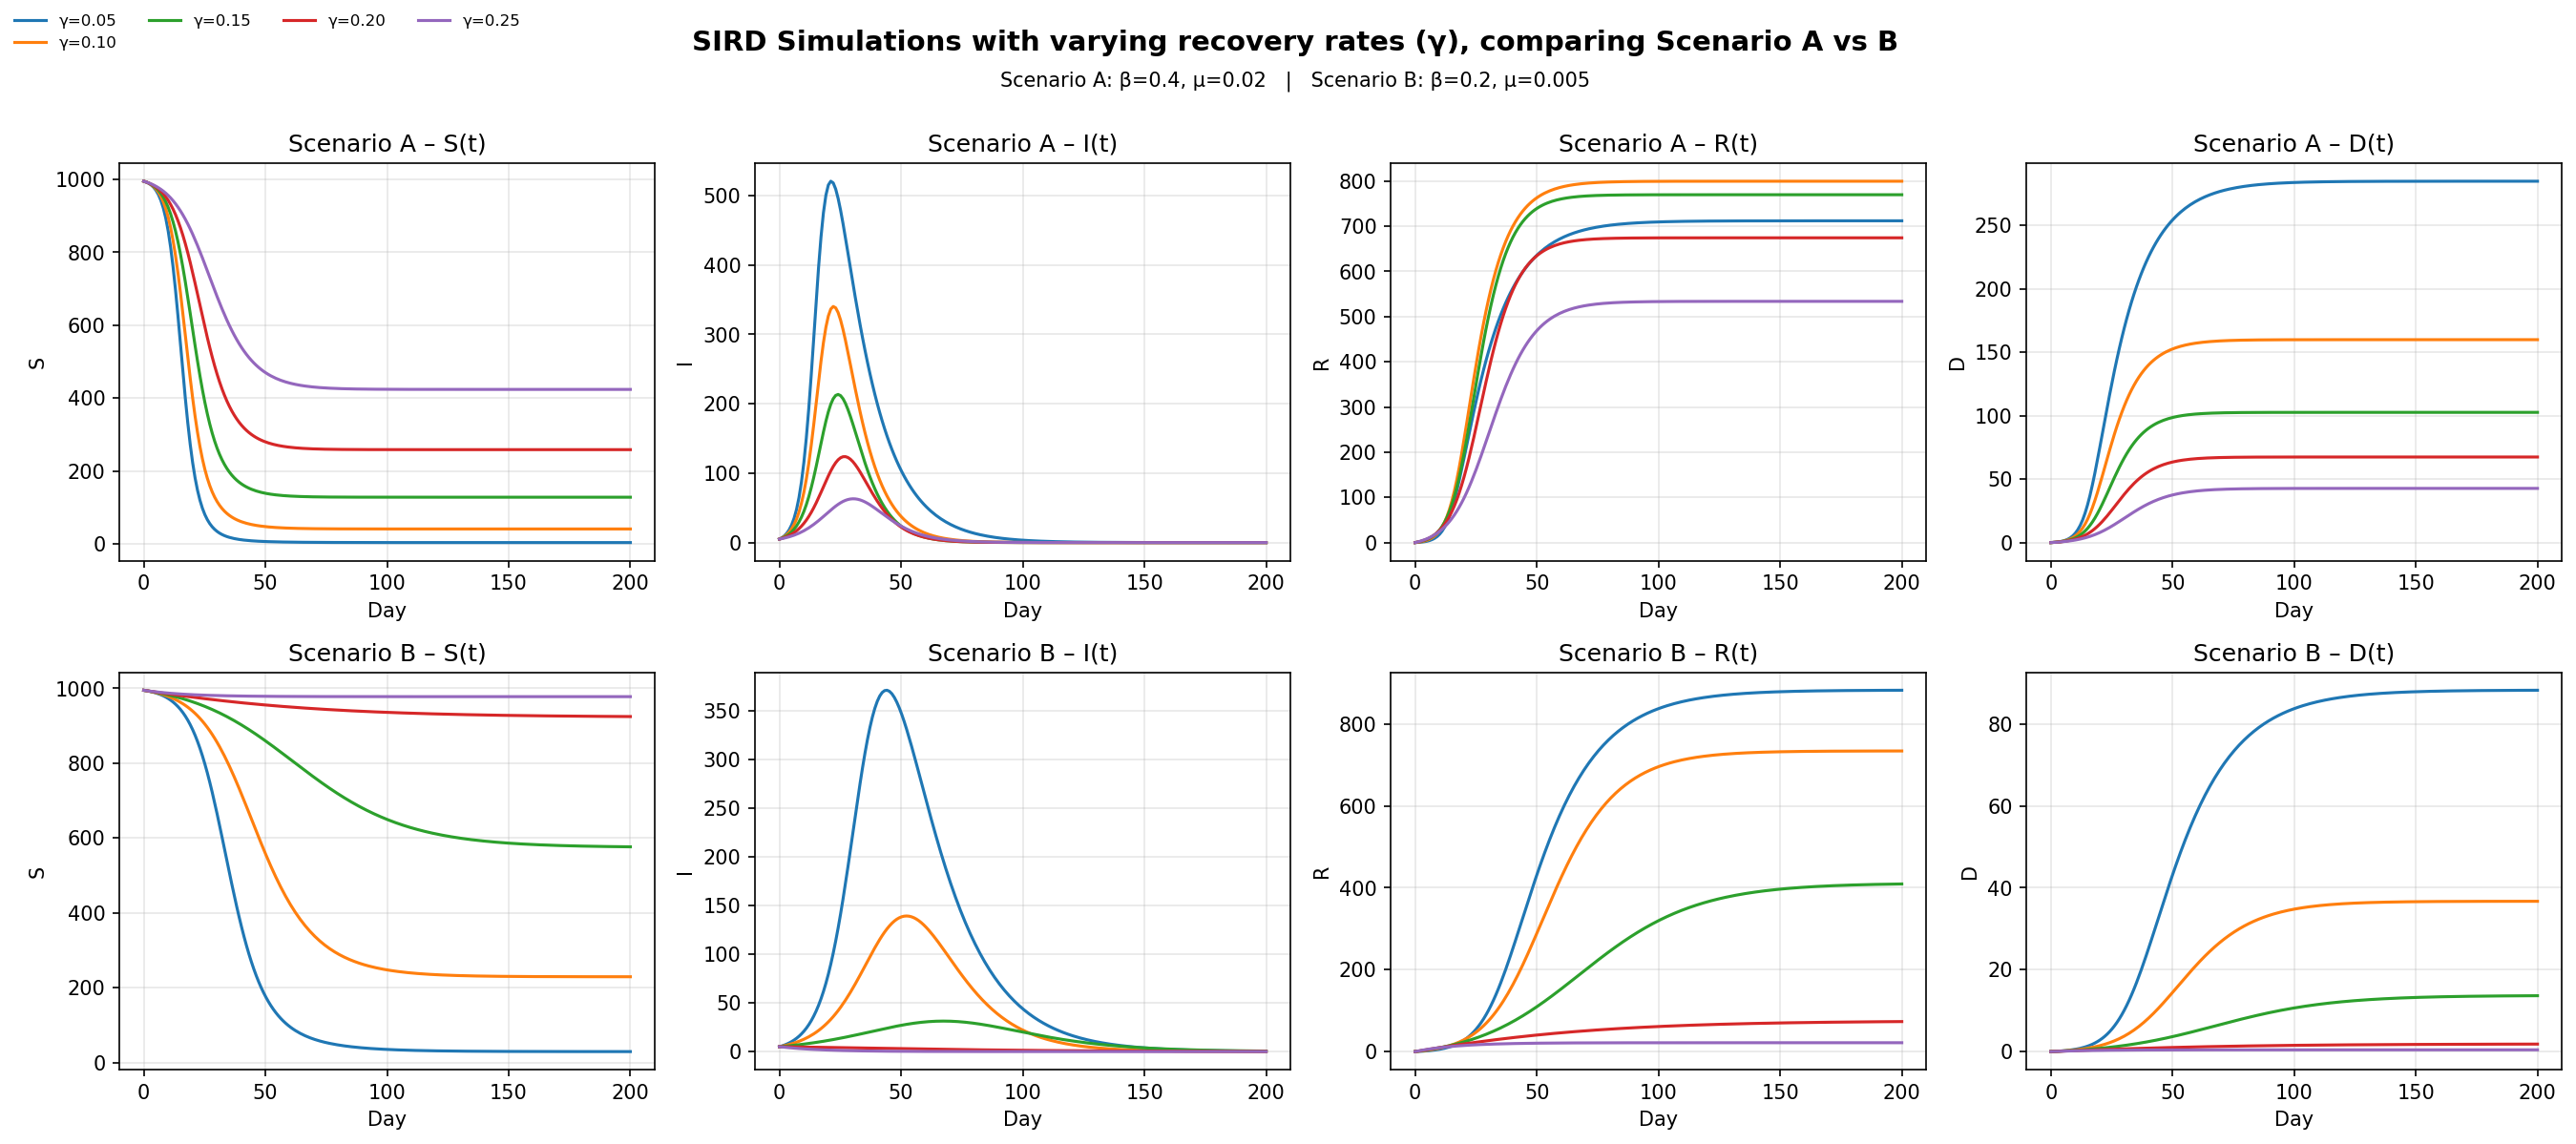

In [ ]:
#2.3:

#creating the compartive visualisation
def create_combined_plot(fig_a, fig_b):
    fig, axs = plt.subplots(2, 4, figsize=(18, 8), dpi=150)

    #flatteninf axes so indexing is easier
    axs = axs.flatten()

    #copy plots from one figure into target axes
    def copy_plots(src_axes, target_axes, prefix):
        for src_ax, target_ax, compartments in zip(src_axes, target_axes, ["S", "I", "R", "D"]):

            #get the line data from the original plots
            for line in src_ax.get_lines():
                target_ax.plot(line.get_xdata(), line.get_ydata(), label=line.get_label())
            #set titles and labels
            target_ax.set_title(f"{prefix} – {compartments}(t)")
            target_ax.set_xlabel("Day")
            target_ax.set_ylabel(compartments)
            target_ax.grid(True, alpha=0.3)

    #copy from scenerio a
    copy_plots(fig_a.axes, axs[:4], "Scenario A")

    #copy from scenerio b
    copy_plots(fig_b.axes, axs[4:], "Scenario B")

    #legend
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper left", ncol=4, frameon=False, fontsize=8)

    #title of the main figure
    fig.suptitle("SIRD Simulations with varying recovery rates (γ), comparing Scenario A vs B" , fontsize=14, weight = "bold")

    #subtitle text block to show the beta and mu values of scenario a and b
    fig.text(0.5, 0.93, f"Scenario A: β={0.4}, μ={0.02}   |   Scenario B: β={0.2}, μ={0.005}",
         ha='center', fontsize=10, )


    #formatting
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

create_combined_plot(fig_a, fig_b)

2.4:
the worst outcome for public health would be sceneria a with a recovery rate of 0.05. this represents a disease with a high transmission rate and a low recovery rate, on top of that it also has a relatively high death rate compared to scenerio b. the high transmission rate of β = 0.4 causes the desease to grow very quickly. in addition to this, the low recovery rate makes people stay infected for longer, allowing them to also infect others for a longer period of time, leading to more overall infections. this can be seen in the figure and in the dataframe, whereit can be obseved that a peak of 520 infections is reached in 21 days. no other scenario gets close to this level of infections. the fast spread of the disease also gives governments less time to act and implement measures to help limit the spread of the disease, making it a more dangerous scenario. addionally the quikc rise in infections could lead to hospitals being overwhelmed, potentially causing mroe people to die due to not have adequate care avaiblable. lastly, the large number of infections in combination with the death rate lead to high death toll, sicne deaths = I * mu. 

disregarding the recovery rates, scenario a still represents a worse outcome compared to scenerio b. b has a lower transmition rate and a lower death rate than a. The lower transmition rate causes the diseas to spread slower and limits the number of total infections. the peak infections reached by scenario b is 371 in 44 dyas, and in 2 cases the disease doesnt even spread after day 1. This is a lot slower compared to scnerio a, creating more time to impose measures to limit the spread and find potential drugs capable of incresing the recovery speed. the size of the infectious group being smaller and the low death rate help dtrasically decrease the number of deaths compared to a. therefore, scenario b is safer for public health.




## Part 3: Policy Recommendations (20 points)

---

### 3.1 Parameter Impact Analysis  
- How does **increasing the recovery rate** affect:  
  - Peak infections  
  - Total deaths  
  - Epidemic duration  
- Use **specific numbers from your results** to support your conclusions.  

---

### 3.2 Intervention Analysis  
- If an intervention could **increase the recovery rate by 50%**, what would be the expected impact on **total deaths**?  
- Use **Scenario A** as your baseline and show your **calculations**.  

---

### 3.3 Real-World Application  
- Name **one real medical intervention** that could increase recovery rates.  
- Explain the **mechanism** and estimate **realistic effectiveness**.  
